## DATA CLEANING AND PROCESSING

In [1]:
import pandas as pd

# Load the data
df = pd.read_csv("energydata_complete.csv", index_col="date")

# Remove unnecessary columns
df = df.drop(["rv1", "rv2"], axis=1)

# Check for missing values
print(df.isnull().sum())

# Forward fill missing values
df = df.fillna(method="ffill")

# Check data types
print(df.dtypes)

# Check for duplicates
print(df.duplicated().sum())

# Convert date-time index to datetime type
df.index = pd.to_datetime(df.index)

# Resample to hourly frequency
df_hourly = df.resample("H").mean()

# Display the cleaned and resampled data
print(df_hourly.head())

Appliances     0
lights         0
T1             0
RH_1           0
T2             0
RH_2           0
T3             0
RH_3           0
T4             0
RH_4           0
T5             0
RH_5           0
T6             0
RH_6           0
T7             0
RH_7           0
T8             0
RH_8           0
T9             0
RH_9           0
T_out          0
Press_mm_hg    0
RH_out         0
Windspeed      0
Visibility     0
Tdewpoint      0
dtype: int64
Appliances       int64
lights           int64
T1             float64
RH_1           float64
T2             float64
RH_2           float64
T3             float64
RH_3           float64
T4             float64
RH_4           float64
T5             float64
RH_5           float64
T6             float64
RH_6           float64
T7             float64
RH_7           float64
T8             float64
RH_8           float64
T9             float64
RH_9           float64
T_out          float64
Press_mm_hg    float64
RH_out         float64
Windspeed      f

In [6]:
import pandas as pd

# Load the dataset
df = pd.read_csv('energydata_complete.csv')

# Calculate the total energy consumption for each row
df['Total Energy'] = df['Appliances'] + df['lights']

# Print the first 10 rows of the dataset with the total energy consumption column
print(df[['date', 'Appliances', 'lights', 'Total Energy']].head(19735))


                   date  Appliances  lights  Total Energy
0      11-01-2016 17:00          60      30            90
1      11-01-2016 17:10          60      30            90
2      11-01-2016 17:20          50      30            80
3      11-01-2016 17:30          50      40            90
4      11-01-2016 17:40          60      40           100
...                 ...         ...     ...           ...
19730  27-05-2016 17:20         100       0           100
19731  27-05-2016 17:30          90       0            90
19732  27-05-2016 17:40         270      10           280
19733  27-05-2016 17:50         420      10           430
19734  27-05-2016 18:00         430      10           440

[19735 rows x 4 columns]


## DATA VISUALIZATION

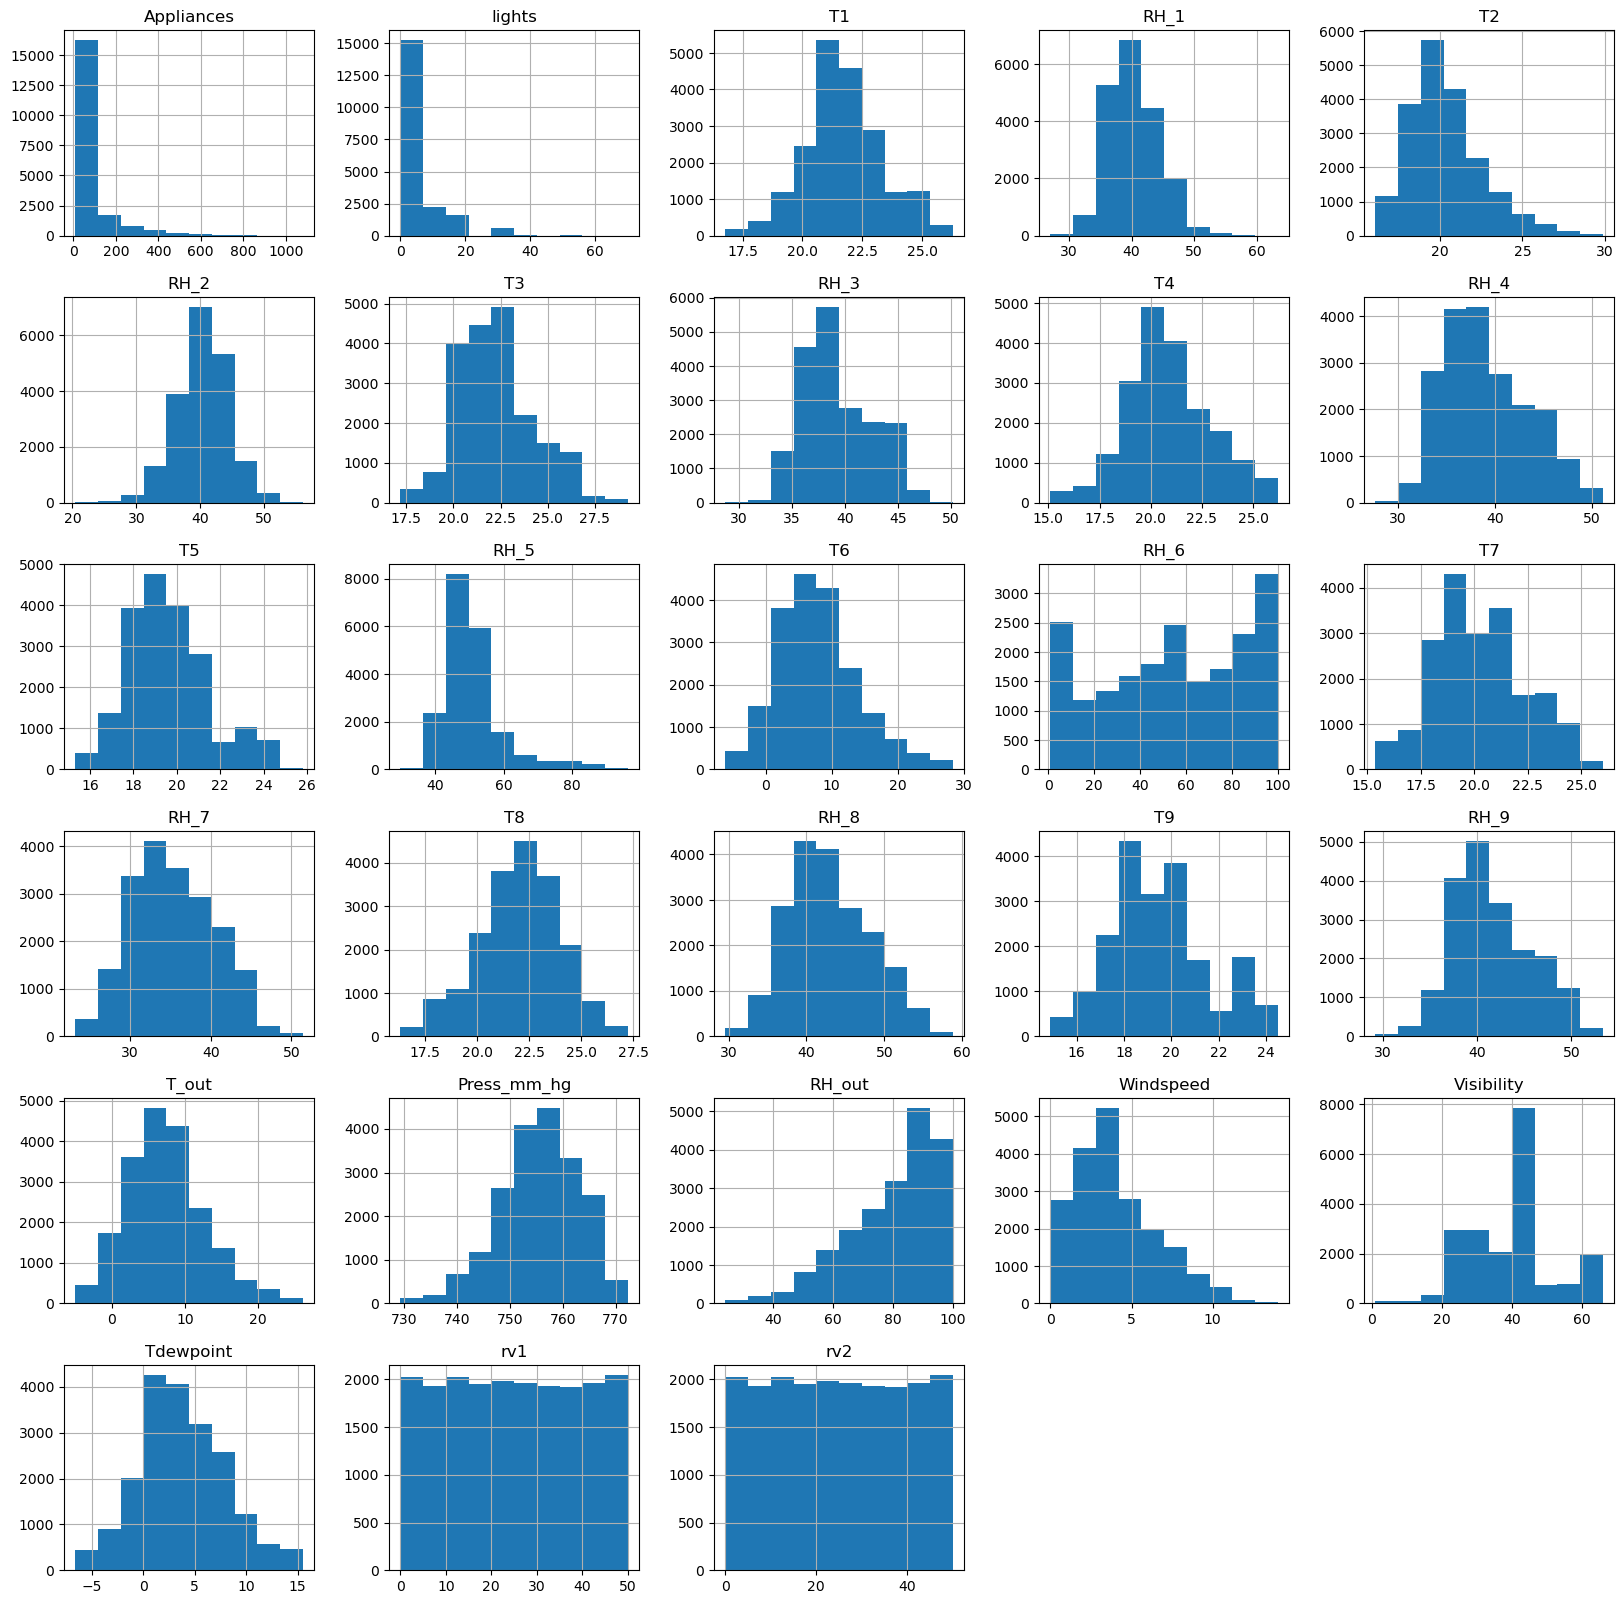

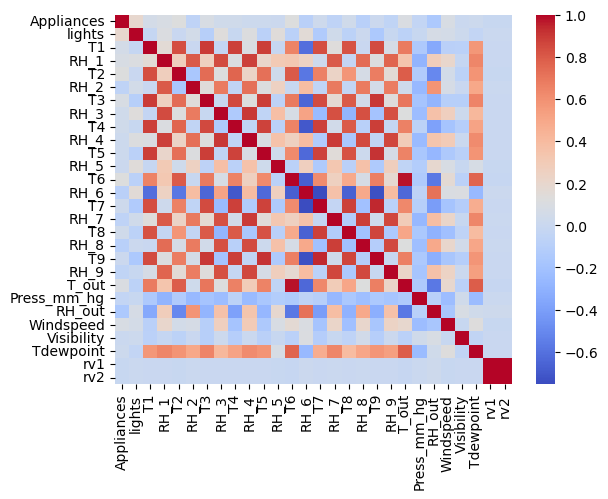

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# plot the histogram of each column in the dataset
df.hist(figsize=(20,20))
plt.show()

# plot the correlation matrix as a heatmap
corr = df.corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=False, cmap='coolwarm')
plt.show()


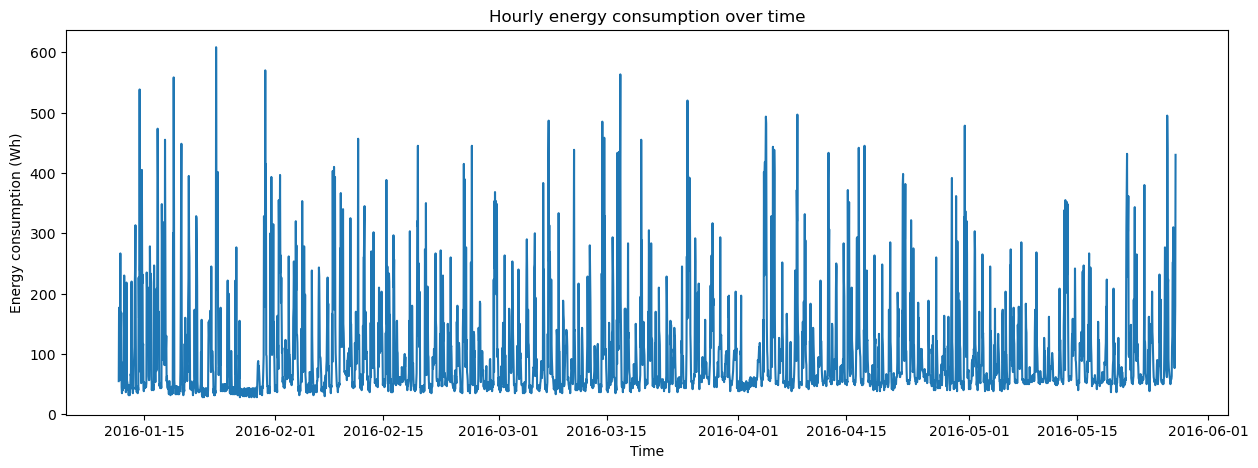

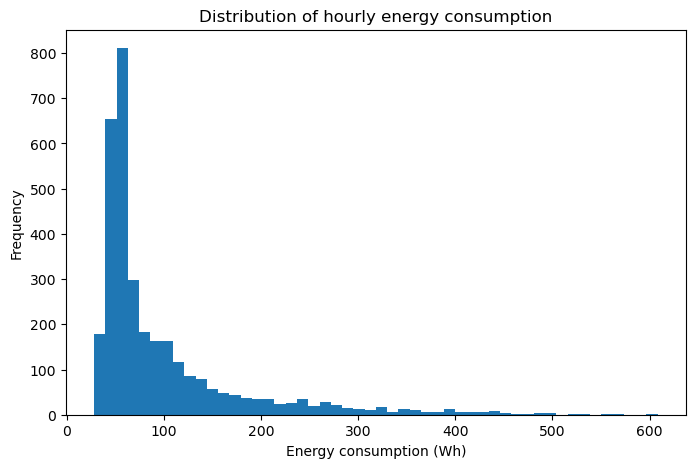

In [4]:
import matplotlib.pyplot as plt

# Plot the energy consumption over time
plt.figure(figsize=(15,5))
plt.plot(df_hourly.index, df_hourly["Appliances"])
plt.xlabel("Time")
plt.ylabel("Energy consumption (Wh)")
plt.title("Hourly energy consumption over time")
plt.show()

# Plot the distribution of energy consumption
plt.figure(figsize=(8,5))
plt.hist(df_hourly["Appliances"], bins=50)
plt.xlabel("Energy consumption (Wh)")
plt.ylabel("Frequency")
plt.title("Distribution of hourly energy consumption")
plt.show()



## CNN

Epoch 1/50
42/42 [==============================] - 1s 11ms/step - loss: 34.6951 - val_loss: 9.5321
Epoch 2/50
42/42 [==============================] - 0s 7ms/step - loss: 6.6860 - val_loss: 3.7349
Epoch 3/50
42/42 [==============================] - 0s 5ms/step - loss: 3.1148 - val_loss: 1.9661
Epoch 4/50
42/42 [==============================] - 0s 5ms/step - loss: 1.9266 - val_loss: 2.7045
Epoch 5/50
42/42 [==============================] - 0s 6ms/step - loss: 1.4763 - val_loss: 1.5339
Epoch 6/50
42/42 [==============================] - 0s 5ms/step - loss: 1.0283 - val_loss: 0.8196
Epoch 7/50
42/42 [==============================] - 0s 5ms/step - loss: 0.8405 - val_loss: 0.6957
Epoch 8/50
42/42 [==============================] - 0s 5ms/step - loss: 0.6684 - val_loss: 0.5918
Epoch 9/50
42/42 [==============================] - 0s 5ms/step - loss: 0.6728 - val_loss: 0.9885
Epoch 10/50
42/42 [==============================] - 0s 6ms/step - loss: 0.5565 - val_loss: 1.7093
Epoch 11/50
42/42

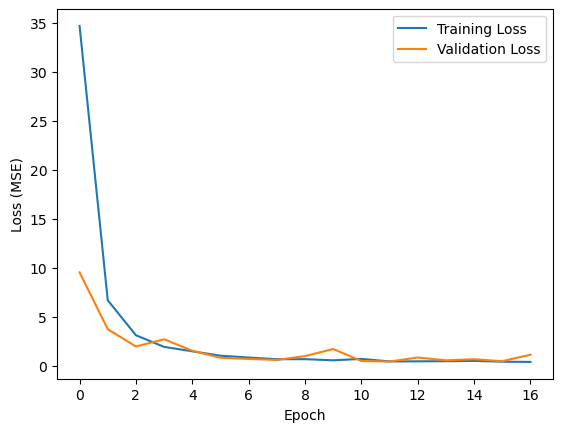

In [5]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv1D, MaxPooling1D, Flatten
from tensorflow.keras.callbacks import EarlyStopping

# Load the data
df = pd.read_csv("energydata_complete.csv", index_col="date")

# Remove unnecessary columns
df = df.drop(["rv1", "rv2"], axis=1)

# Check for missing values
df = df.fillna(method="ffill")

# Convert date-time index to datetime type
df.index = pd.to_datetime(df.index)

# Resample to hourly frequency
df = df.resample("H").mean()

# Prepare data for training and testing
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values.reshape(-1, 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Reshape input data for CNN
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# Define the CNN model
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(50, activation='relu'))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mse')

# Set early stopping criteria
early_stop = EarlyStopping(monitor='val_loss', patience=5)

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=64, validation_data=(X_test, y_test), callbacks=[early_stop])

# Evaluate the model
loss = model.evaluate(X_test, y_test)
print('Test Loss:', loss)

# Plot the training and validation loss
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.show()


Epoch 1/50
42/42 [==============================] - 1s 8ms/step - loss: 158.4096 - val_loss: 30.5840
Epoch 2/50
42/42 [==============================] - 0s 5ms/step - loss: 17.4566 - val_loss: 12.3821
Epoch 3/50
42/42 [==============================] - 0s 5ms/step - loss: 8.8936 - val_loss: 6.5182
Epoch 4/50
42/42 [==============================] - 0s 5ms/step - loss: 5.7660 - val_loss: 3.5960
Epoch 5/50
42/42 [==============================] - 0s 5ms/step - loss: 3.4755 - val_loss: 3.0778
Epoch 6/50
42/42 [==============================] - 0s 5ms/step - loss: 2.7969 - val_loss: 2.0302
Epoch 7/50
42/42 [==============================] - 0s 5ms/step - loss: 2.1267 - val_loss: 1.7766
Epoch 8/50
42/42 [==============================] - 0s 5ms/step - loss: 1.8828 - val_loss: 1.4237
Epoch 9/50
42/42 [==============================] - 0s 6ms/step - loss: 1.5919 - val_loss: 2.0138
Epoch 10/50
42/42 [==============================] - 0s 5ms/step - loss: 1.2192 - val_loss: 1.0067
Epoch 11/50
42

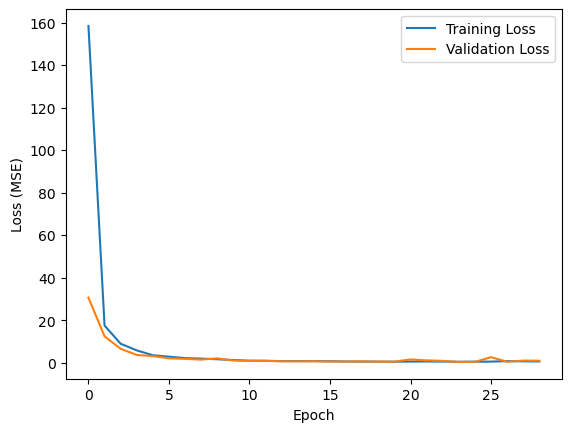

In [8]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv1D, MaxPooling1D, Flatten
from tensorflow.keras.callbacks import EarlyStopping

# Load the data
df = pd.read_csv("energydata_complete.csv", index_col="date")

# Remove unnecessary columns
df = df.drop(["rv1", "rv2"], axis=1)

# Check for missing values
df = df.fillna(method="ffill")

# Convert date-time index to datetime type
df.index = pd.to_datetime(df.index)

# Resample to hourly frequency
df = df.resample("H").mean()

# Prepare data for training and testing
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values.reshape(-1, 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Reshape input data for CNN
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# Define the CNN model
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(50, activation='relu'))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mse')

# Set early stopping criteria
early_stop = EarlyStopping(monitor='val_loss', patience=5)

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=64, validation_data=(X_test, y_test), callbacks=[early_stop])

# Predict the output using the trained model
y_pred = model.predict(X_test)

# Calculate the MSE
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)

# Plot the training and validation loss
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.show()


21/21 [==============================] - 0s 2ms/step


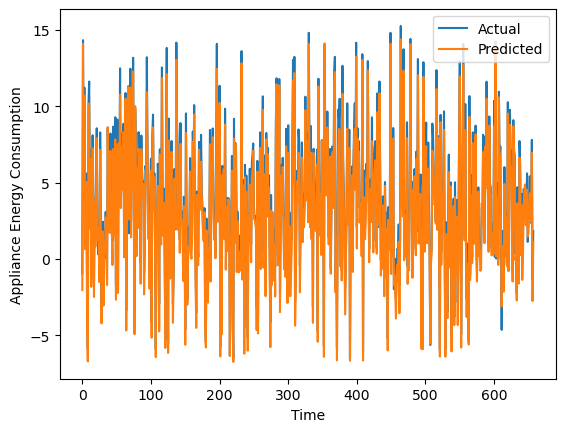

In [10]:
# Generate predictions on test data
y_pred = model.predict(X_test)

# Plot actual vs predicted values
plt.plot(y_test, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.xlabel('Time')
plt.ylabel('Appliance Energy Consumption')
plt.legend()
plt.show()


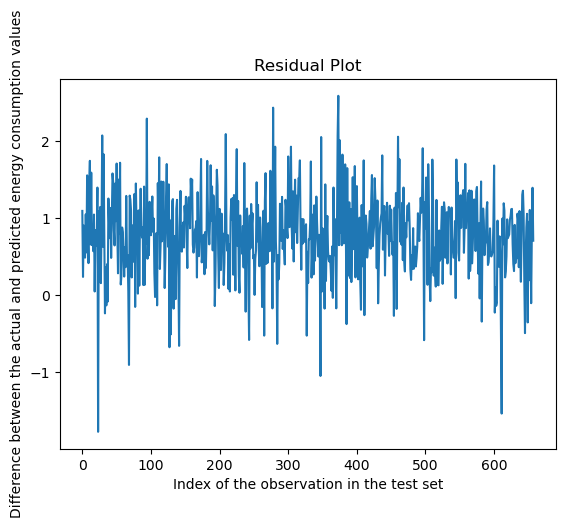

In [19]:
import matplotlib.pyplot as plt

# Calculate the residuals
residuals = y_test - y_pred

# Plot the residuals
plt.plot(residuals)
plt.xlabel('Index of the observation in the test set')
plt.ylabel('Difference between the actual and predicted energy consumption values')
plt.title('Residual Plot')
plt.show()


21/21 [==============================] - 0s 3ms/step


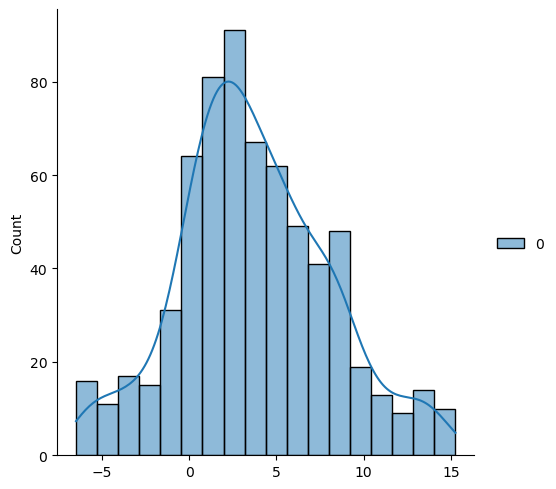

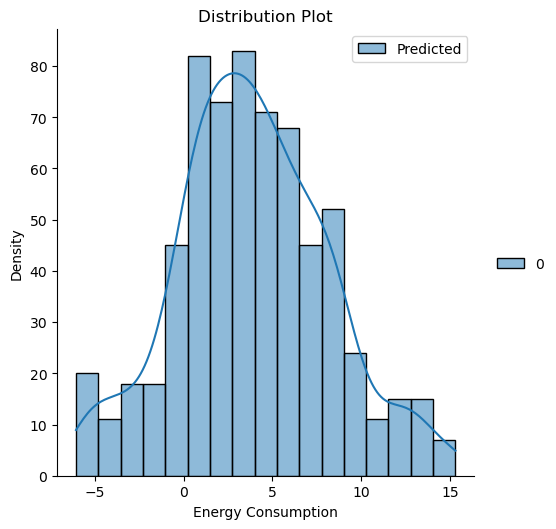

In [20]:
import seaborn as sns

# Get the predicted values
y_pred = model.predict(X_test)

# Plot the distribution of energy consumption values
sns.displot(y_test, kde=True, label='Actual')
sns.displot(y_pred, kde=True, label='Predicted')
plt.xlabel('Energy Consumption')
plt.ylabel('Density')
plt.title('Distribution Plot')
plt.legend()
plt.show()


## LSTM for time series

Epoch 1/100
192/192 - 8s - loss: 0.0064 - 8s/epoch - 39ms/step
Epoch 2/100
192/192 - 3s - loss: 0.0049 - 3s/epoch - 18ms/step
Epoch 3/100
192/192 - 3s - loss: 0.0043 - 3s/epoch - 18ms/step
Epoch 4/100
192/192 - 3s - loss: 0.0041 - 3s/epoch - 17ms/step
Epoch 5/100
192/192 - 3s - loss: 0.0041 - 3s/epoch - 17ms/step
Epoch 6/100
192/192 - 3s - loss: 0.0041 - 3s/epoch - 18ms/step
Epoch 7/100
192/192 - 3s - loss: 0.0040 - 3s/epoch - 18ms/step
Epoch 8/100
192/192 - 4s - loss: 0.0040 - 4s/epoch - 19ms/step
Epoch 9/100
192/192 - 4s - loss: 0.0040 - 4s/epoch - 19ms/step
Epoch 10/100
192/192 - 3s - loss: 0.0040 - 3s/epoch - 18ms/step
Epoch 11/100
192/192 - 3s - loss: 0.0040 - 3s/epoch - 18ms/step
Epoch 12/100
192/192 - 4s - loss: 0.0040 - 4s/epoch - 19ms/step
Epoch 13/100
192/192 - 4s - loss: 0.0040 - 4s/epoch - 20ms/step
Epoch 14/100
192/192 - 4s - loss: 0.0040 - 4s/epoch - 20ms/step
Epoch 15/100
192/192 - 4s - loss: 0.0040 - 4s/epoch - 20ms/step
Epoch 16/100
192/192 - 4s - loss: 0.0040 - 4s/epo

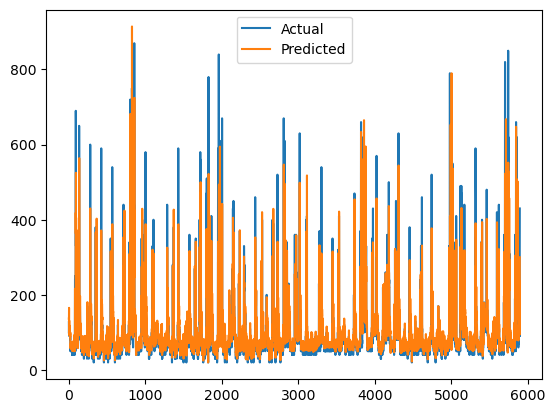

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, LSTM
from sklearn.preprocessing import MinMaxScaler

# Load the dataset
df = pd.read_csv('energydata_complete.csv', parse_dates=['date'], index_col='date')

# Extract the target variable
target_var = 'Appliances'
target = df[target_var].values

# Normalize the target variable
scaler = MinMaxScaler(feature_range=(0, 1))
target = scaler.fit_transform(target.reshape(-1, 1))

# Define the time window size
time_window = 24

# Split the data into training and testing sets
train_size = int(len(target) * 0.7)
test_size = len(target) - train_size
train, test = target[0:train_size,:], target[train_size:len(target),:]

# Convert the dataset into a time series dataset
def create_dataset(dataset, time_window=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_window):
        a = dataset[i:(i+time_window), 0]
        dataX.append(a)
        dataY.append(dataset[i + time_window, 0])
    return np.array(dataX), np.array(dataY)

trainX, trainY = create_dataset(train, time_window)
testX, testY = create_dataset(test, time_window)

# Reshape the data for LSTM input
trainX = np.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))
testX = np.reshape(testX, (testX.shape[0], testX.shape[1], 1))

# Build the LSTM model
model = Sequential()
model.add(LSTM(50, input_shape=(time_window, 1)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
# Train the model
model.fit(trainX, trainY, epochs=100, batch_size=72, verbose=2)

# Make predictions on the testing set
testPredict = model.predict(testX)
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

# Plot the actual and predicted values
plt.plot(testY[0], label='Actual')
plt.plot(testPredict[:,0], label='Predicted')
plt.legend()
plt.show()
